In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('elementary_data_processed.csv')

In [3]:
#df.reset_index(inplace = True , drop = True)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,hour,amount_log
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,5.008166
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0.993252
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,5.936665
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,4.816322
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,4.248495


In [5]:
df.shape

(284204, 33)

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,hour,amount_log
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,5.008166
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0.993252
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,5.936665
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,4.816322
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,4.248495


In [7]:
#df.reset_index(inplace = True , drop = True)

# Machine Learning Step 1

In [3]:
y = df['Class'].values

X = df.drop(columns = ['Time' , 'hour' , 'Class', 'amount_log']) # Try out with different combinations

In [5]:
df.reset_index(inplace = True , drop = True)

In [6]:
#pd.Series(y).value_counts()
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
df.reset_index(inplace = True , drop = True)

In [12]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284199,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284200,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284201,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284202,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


# Setting the Baseline

In [4]:
from sklearn.linear_model import LogisticRegression # Importing Classifier Step
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # Sequence for splitting


logreg = LogisticRegression() # () towards the end
logreg.fit(X_train, y_train)   

LogisticRegression()

In [6]:
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score


print(accuracy_score(y_pred , y_test))

0.9990499870985903


In [8]:
pd.Series(y_pred).value_counts()

0    85144
1      118
dtype: int64

In [11]:
pd.Series(y_test).value_counts()

0    85105
1      157
dtype: int64

In [12]:
118/157

0.7515923566878981

# Class Imbalance ! 

In [7]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test , y_pred)

cnf_matrix

array([[85084,    21],
       [   60,    97]], dtype=int64)

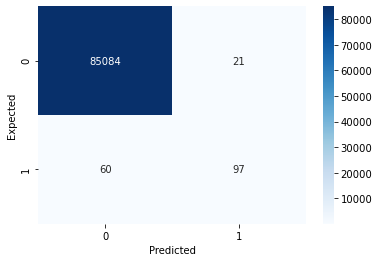

In [13]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [14]:
pd.Series(y_test).value_counts()

0    85105
1      157
dtype: int64

In [15]:
pd.Series(y_pred).value_counts()

0    85144
1      118
dtype: int64

In [16]:
len(y_test)

85262

In [17]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test , y_pred) 

# Accuracy - 99%
# Accuracy Stage 1 - 62%
# Accuracy Stage 2 - 52%

0.808793820447353

In [18]:
y_pred_proba = logreg.predict_proba(X_test)

In [19]:
y_pred_proba

array([[9.99707071e-01, 2.92929082e-04],
       [9.99933827e-01, 6.61728674e-05],
       [9.99761738e-01, 2.38262165e-04],
       ...,
       [9.99858185e-01, 1.41814528e-04],
       [9.99880613e-01, 1.19387434e-04],
       [9.99908330e-01, 9.16700774e-05]])

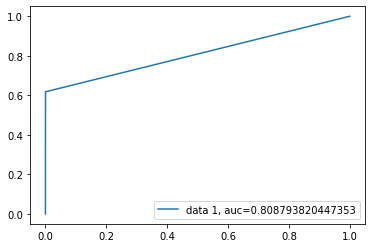

In [20]:
# Here is the Problem ! 

from sklearn.metrics import roc_curve

y_pred_proba = logreg.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(y_test,  y_pred)

auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

plt.legend(loc=4)
plt.show()

# Let's Fix the class Imbalance and apply some sampling techniques

In [21]:
# the imblearn library
#!pip install imblearn

In [8]:
import imblearn

In [9]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler


In [24]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,hour,amount_log
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,5.008166
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0.993252
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,5.936665
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,4.816322
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,4.248495


In [10]:
from collections import Counter # counter takes values returns value_counts dictionary
from sklearn.datasets import make_classification

#X, y = make_classification(n_classes=2) #, class_sep=2,weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))

rus = RandomUnderSampler(random_state=42)

X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 283712, 1: 492})
Resampled dataset shape Counter({0: 492, 1: 492})


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [14]:
y_pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred , y_test))  # Accuracy is surely reduced , let's look at the roc curve now

0.9358108108108109


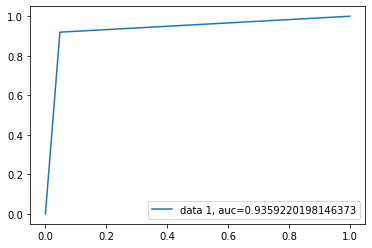

In [22]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Let's try Oversampling

In [11]:
from imblearn.over_sampling import RandomOverSampler

In [30]:
print('Original dataset shape %s' % Counter(y))
random_state = 42

rus = RandomOverSampler(random_state=random_state)

X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


Original dataset shape Counter({0: 283712, 1: 492})
Resampled dataset shape Counter({0: 283712, 1: 283712})


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [12]:
from sklearn.metrics import accuracy_score

In [32]:
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred , y_test))  # Accuracy is surely reducedd , let's look at the roc curve now


0.9474587024461311


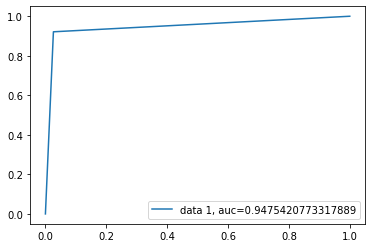

In [33]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# SMOTE Sampling

In [13]:
from imblearn.over_sampling import SMOTE, ADASYN

In [35]:
print('Original dataset shape %s' % Counter(y))

rus = SMOTE(random_state=42)

X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 283712, 1: 492})
Resampled dataset shape Counter({0: 283712, 1: 283712})


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [37]:
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred , y_test))  # Accuracy is surely reducedd , let's look at the roc curve now

0.9590666635336137


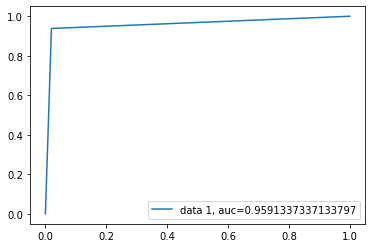

In [38]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [39]:
# Let's Visulaise the SMOTE
len(y)
#plt.scatter(x = X , y = y)

284204

# ADASYN

In [40]:
print('Original dataset shape %s' % Counter(y))

rus = ADASYN(random_state=42)

X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 283712, 1: 492})
Resampled dataset shape Counter({1: 283747, 0: 283712})


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [42]:
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred , y_test))  # Accuracy is surely reducedd , let's look at the roc curve now

0.917674079817667


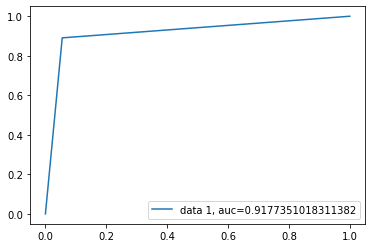

In [43]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Principal Component Analysis

In [14]:
from sklearn.decomposition import PCA

In [44]:
from sklearn.decomposition import PCA # SVD , t-SNE , Linear Discrimant Analysis
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X_res)

In [52]:
# reduce 29 columns - 2 columns , so that I can look at them in a plot !

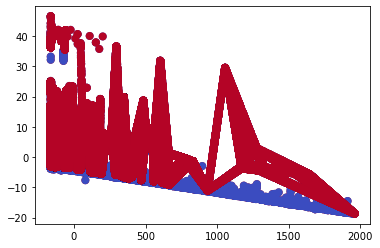

In [53]:
#f,ax = plt.figure(figsize=(24,6))

plt.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_res== 0), cmap='coolwarm', label='No Fraud', linewidths=2)
plt.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_res == 1), cmap='coolwarm', label='Fraud', linewidths=2)
plt.show()

In [54]:
# let's now try either different models , first by creating multiple datsets for undersampled , oversampled and SMOTE sampled

# Undersampled Data

In [15]:
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_under))


Resampled dataset shape Counter({0: 492, 1: 492})


# Oversampled Data

In [16]:
rus = RandomOverSampler(random_state=42)
X_over, y_over = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_over))

Resampled dataset shape Counter({0: 283712, 1: 283712})


# SMOTE Data

In [17]:
rus = SMOTE(random_state=42)
X_smote, y_smote = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_smote))

Resampled dataset shape Counter({0: 283712, 1: 283712})


# Now applying different models and evaluating the dataset

In [18]:
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Classifier 2 - Decision Tree Classifier

0.9991320869789589


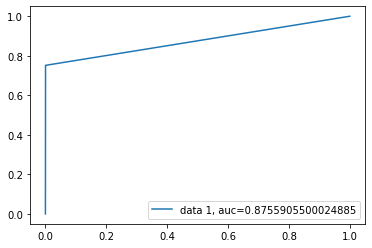

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


dte = DecisionTreeClassifier()
dte.fit( X_train, y_train )




y_pred = dte.predict(X_test)

print(accuracy_score(y_pred , y_test))

y_pred_proba = dte.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

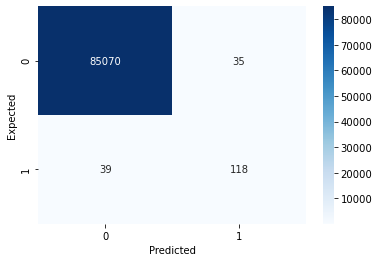

In [60]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

0.8885135135135135


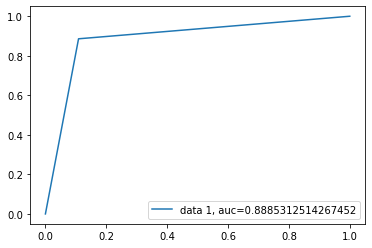

In [61]:
# Undersampled data with Decision Tree Classifiers

X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=0)
dte = DecisionTreeClassifier()
dte.fit(X_train, y_train)

y_pred = dte.predict(X_test)
print(accuracy_score(y_pred , y_test))

y_pred_proba = dte.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

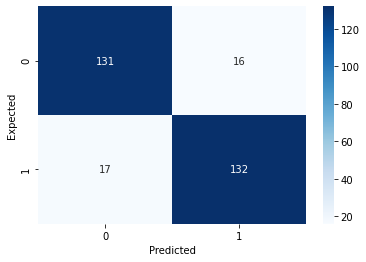

In [62]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

0.9997708955048523


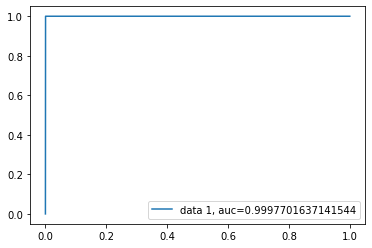

In [63]:
# Oversampled data with Decision Tree Classifiers # Best model after Classifier - DTE

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0)
dte = DecisionTreeClassifier()
dte.fit(X_train, y_train)

y_pred = dte.predict(X_test)
print(accuracy_score(y_pred , y_test))

y_pred_proba = dte.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

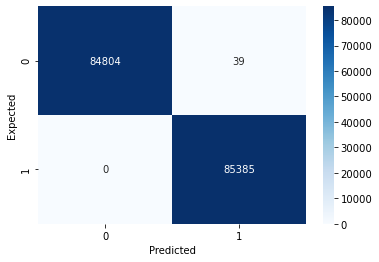

In [64]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

0.9980144277087201


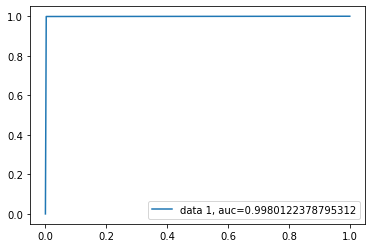

In [65]:
# SMOTE data with Decision Tree Classifiers

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)
dte = DecisionTreeClassifier()
dte.fit(X_train, y_train)

y_pred = dte.predict(X_test)
print(accuracy_score(y_pred , y_test))

y_pred_proba = dte.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

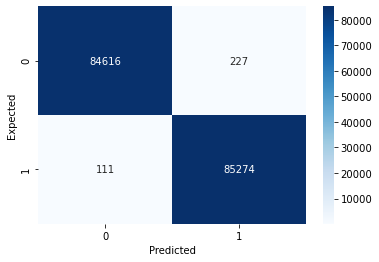

In [66]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# Classifier - 3 Random Forest Classifier

In [67]:
# Raw Data

0.9995777720438179


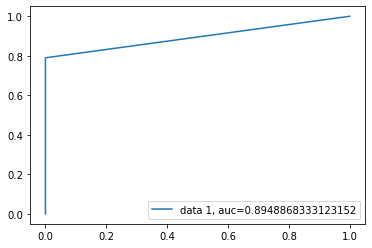

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
rfc = RandomForestClassifier()
rfc.fit( X_train, y_train )

y_pred = rfc.predict(X_test)

print(accuracy_score(y_pred , y_test))

y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

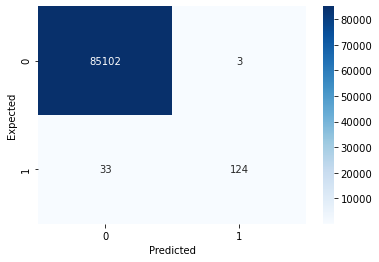

In [71]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
# Undersampled

0.9222972972972973


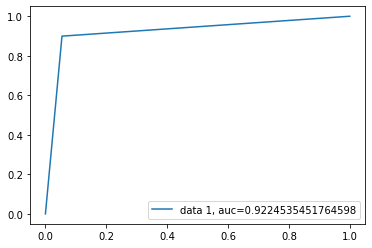

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=0)
rfc = RandomForestClassifier()
rfc.fit( X_train, y_train )

y_pred = rfc.predict(X_test)

print(accuracy_score(y_pred , y_test))

y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

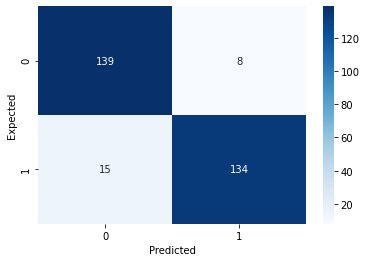

In [73]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
# Oversampled Data

0.9999765021030618


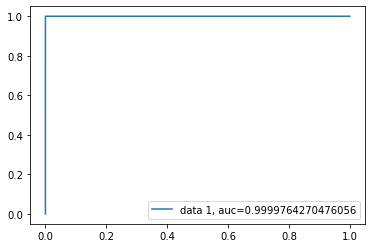

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0)
rfc = RandomForestClassifier()
rfc.fit( X_train, y_train )

y_pred = rfc.predict(X_test)

print(accuracy_score(y_pred , y_test))

y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

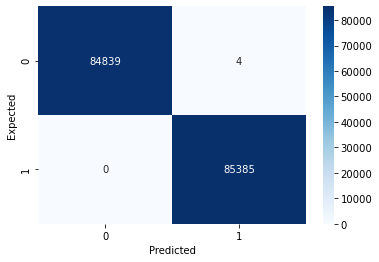

In [22]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
# Smote Data

0.999894259463778


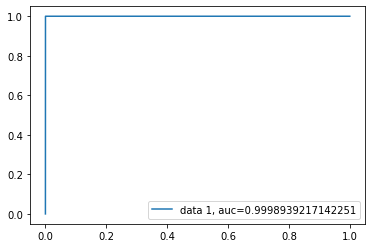

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)
rfc = RandomForestClassifier()
rfc.fit( X_train, y_train )

y_pred = rfc.predict(X_test)

print(accuracy_score(y_pred , y_test))

y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

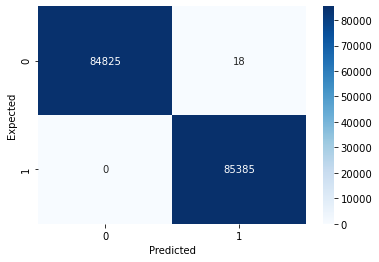

In [24]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# Classifier - 4 SVC

In [ ]:
y_pred_proba = svc.predict_proba(X_test)[::,1]

0.9988388731204991


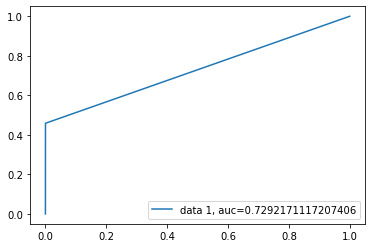

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
svc = SVC()
svc.fit( X_train, y_train )

y_pred = svc.predict(X_test)

print(accuracy_score(y_pred , y_test))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

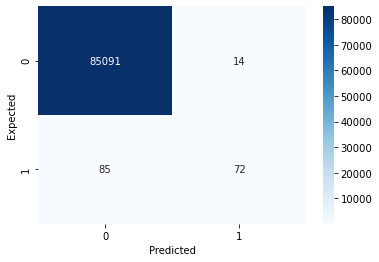

In [53]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
#UnderSampled

0.7837837837837838


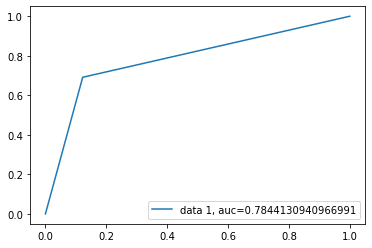

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=0)
svc = SVC()
svc.fit( X_train, y_train )

y_pred = svc.predict(X_test)

print(accuracy_score(y_pred , y_test))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

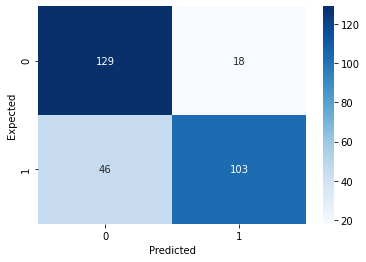

In [56]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
#oversampled

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0)
svc = SVC()
svc.fit( X_train, y_train )

y_pred = svc.predict(X_test)

print(accuracy_score(y_pred , y_test))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

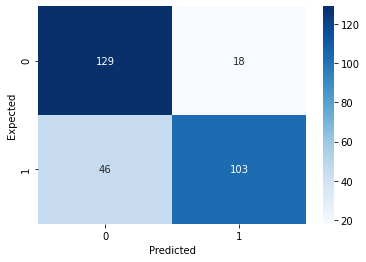

In [57]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
#smote

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)
svc = SVC()
svc.fit( X_train, y_train )

y_pred = svc.predict(X_test)

print(accuracy_score(y_pred , y_test))

y_pred_proba = svc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# Classifier 4 - KNeighbours

0.9992611010766813


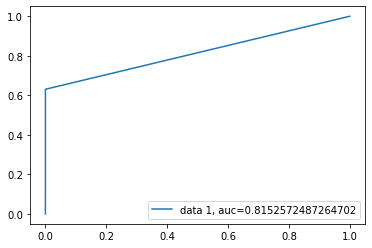

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knc = KNeighborsClassifier()
knc.fit( X_train, y_train )

y_pred = knc.predict(X_test)

print(accuracy_score(y_pred , y_test))

y_pred_proba = knc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

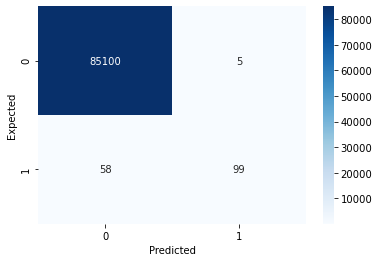

In [33]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
#Undersampled

0.8817567567567568


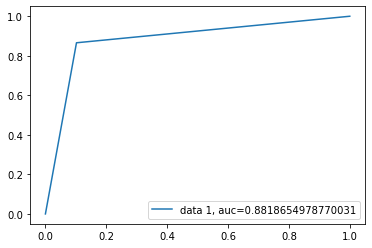

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=0)
knc = KNeighborsClassifier()
knc.fit( X_train, y_train )

y_pred = knc.predict(X_test)

print(accuracy_score(y_pred , y_test))

y_pred_proba = knc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

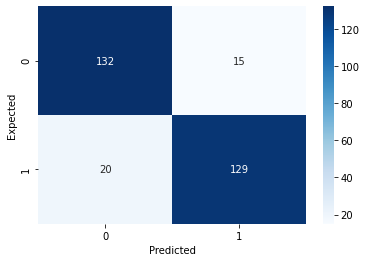

In [35]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
#Oversampled

0.9996357825974576


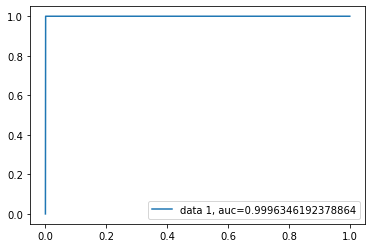

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0)
knc = KNeighborsClassifier()
knc.fit( X_train, y_train )

y_pred = knc.predict(X_test)

print(accuracy_score(y_pred , y_test))

y_pred_proba = knc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

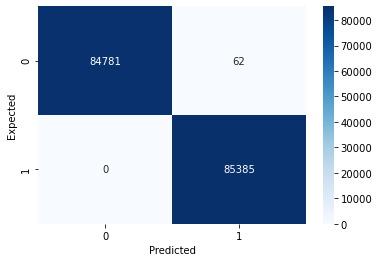

In [37]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
#Smote

0.9981319171934112


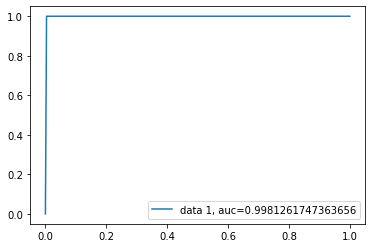

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)
knc = KNeighborsClassifier()
knc.fit( X_train, y_train )

y_pred = knc.predict(X_test)

print(accuracy_score(y_pred , y_test))

y_pred_proba = knc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

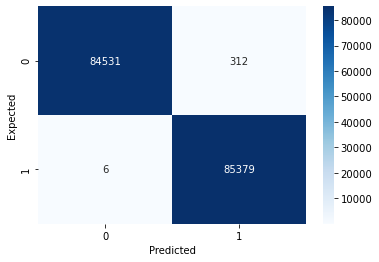

In [39]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
logreg

# Power of GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

print(knears_neighbors)

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_




In [ ]:
log_reg 

In [ ]:
models = [(Model , params) , (model , params) , (m,p) , (m,p)]
max_accuracy = {'model':'' , 'accuracy':''}

for model, params in models:
    
    temp_model = GridSearchCV(model , params)
    temp_model.fit(X_train , y_train)
    print(temp_model.best_estimator_)
    

In [ ]:
y = F(x)

# Output : Over-Sampled Data under Random Forest Classifier is giving the best results